Importing all the modules

In [1]:
import datetime as dt
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure


Specifying the Date

In [2]:
end = dt.date.today()
start = dt.datetime(end.year,end.month-1,end.day)

Collecting the Data set

In [3]:
com_df1 = pd.DataFrame(data.DataReader('BSE/BOM532500', 'quandl', start=start, end=end )['Close'])    #Maruti_Suzuki

In [4]:
com_df2 = pd.DataFrame(data.DataReader('BSE/BOM500520', 'quandl', start=start, end=end )['Close'])    #Mahindra

In [5]:
com_df3 = pd.DataFrame(data.DataReader('BSE/BOM500500', 'quandl', start=start, end=end )['Close'])    #Hind_Motors

In [6]:
com_df4 = pd.DataFrame(data.DataReader('BSE/BOM532977', 'quandl', start=start, end=end )['Close'])    #Bajaj_Auto

In [7]:
com_df5 = pd.DataFrame(data.DataReader('BSE/BOM500182', 'quandl', start=start, end=end )['Close'])    #Hero_Motocorp

Renaming the close columns

In [8]:
Maruti_Suzuki = com_df1.rename(columns={'Close':'Maruti_Suzuki'})
Mahindra = com_df2.rename(columns={'Close':'Mahindra'})
Hind_Motors = com_df3.rename(columns={'Close':'Hind_Motors'})
Bajaj_Auto = com_df4.rename(columns={'Close':'Bajaj_Auto'})
Hero_Motocorp = com_df5.rename(columns={'Close':'Hero_Motocorp'})

Joinig all the data frames

In [9]:
close_df = (((Maruti_Suzuki.join(Mahindra, how="outer")).join(Hind_Motors, how="outer")).join(Bajaj_Auto, how="outer")).join(Hero_Motocorp,how="outer")

In [10]:
close_df

,Maruti_Suzuki,Mahindra,Hind_Motors,Bajaj_Auto,Hero_Motocorp
Date,,,,,
2018-08-14,9129.85,952.05,8.00,2645.55,3263.00
2018-08-13,9090.25,954.05,7.99,2632.55,3305.60
2018-08-10,9151.35,945.00,7.93,2631.25,3321.40
2018-08-09,9156.40,933.25,7.84,2660.75,3275.15
2018-08-08,9209.50,928.05,7.65,2658.00,3298.40
2018-08-07,9396.80,926.30,7.74,2683.85,3301.80
2018-08-06,9287.35,933.05,7.62,2688.10,3296.95
2018-08-03,9188.35,919.60,7.46,2688.65,3246.10
2018-08-02,9156.70,911.00,7.46,2679.50,3266.75


In [11]:
import seaborn as sns
sns.set_style('whitegrid')

In [12]:
rets = close_df.pct_change()                                    #returns -- one day percent change for each of the stocks
rets.head()

,Maruti_Suzuki,Mahindra,Hind_Motors,Bajaj_Auto,Hero_Motocorp
Date,,,,,
2018-08-14,NaN,NaN,NaN,NaN,NaN
2018-08-13,-0.004337,0.002101,-0.001250,-0.004914,0.013055
2018-08-10,0.006721,-0.009486,-0.007509,-0.000494,0.004780
2018-08-09,0.000552,-0.012434,-0.011349,0.011211,-0.013925
2018-08-08,0.005799,-0.005572,-0.024235,-0.001034,0.007099


# Pair Plotting

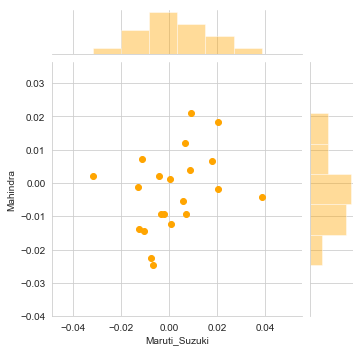

In [13]:
sns.jointplot('Maruti_Suzuki','Mahindra',rets, kind='scatter',height=5, color='orange')

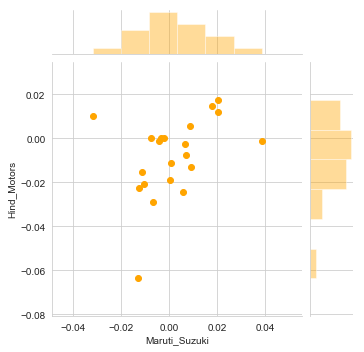

In [14]:
sns.jointplot('Maruti_Suzuki','Hind_Motors',rets, kind='scatter',height=5, color='orange')

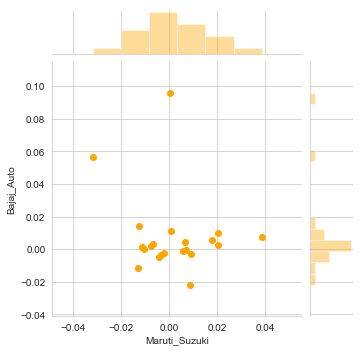

In [15]:
sns.jointplot('Maruti_Suzuki','Bajaj_Auto',rets, kind='scatter',height=5, color='orange')

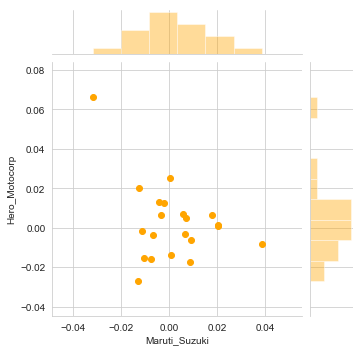

In [16]:
sns.jointplot('Maruti_Suzuki','Hero_Motocorp',rets, kind='scatter',height=5, color='orange')

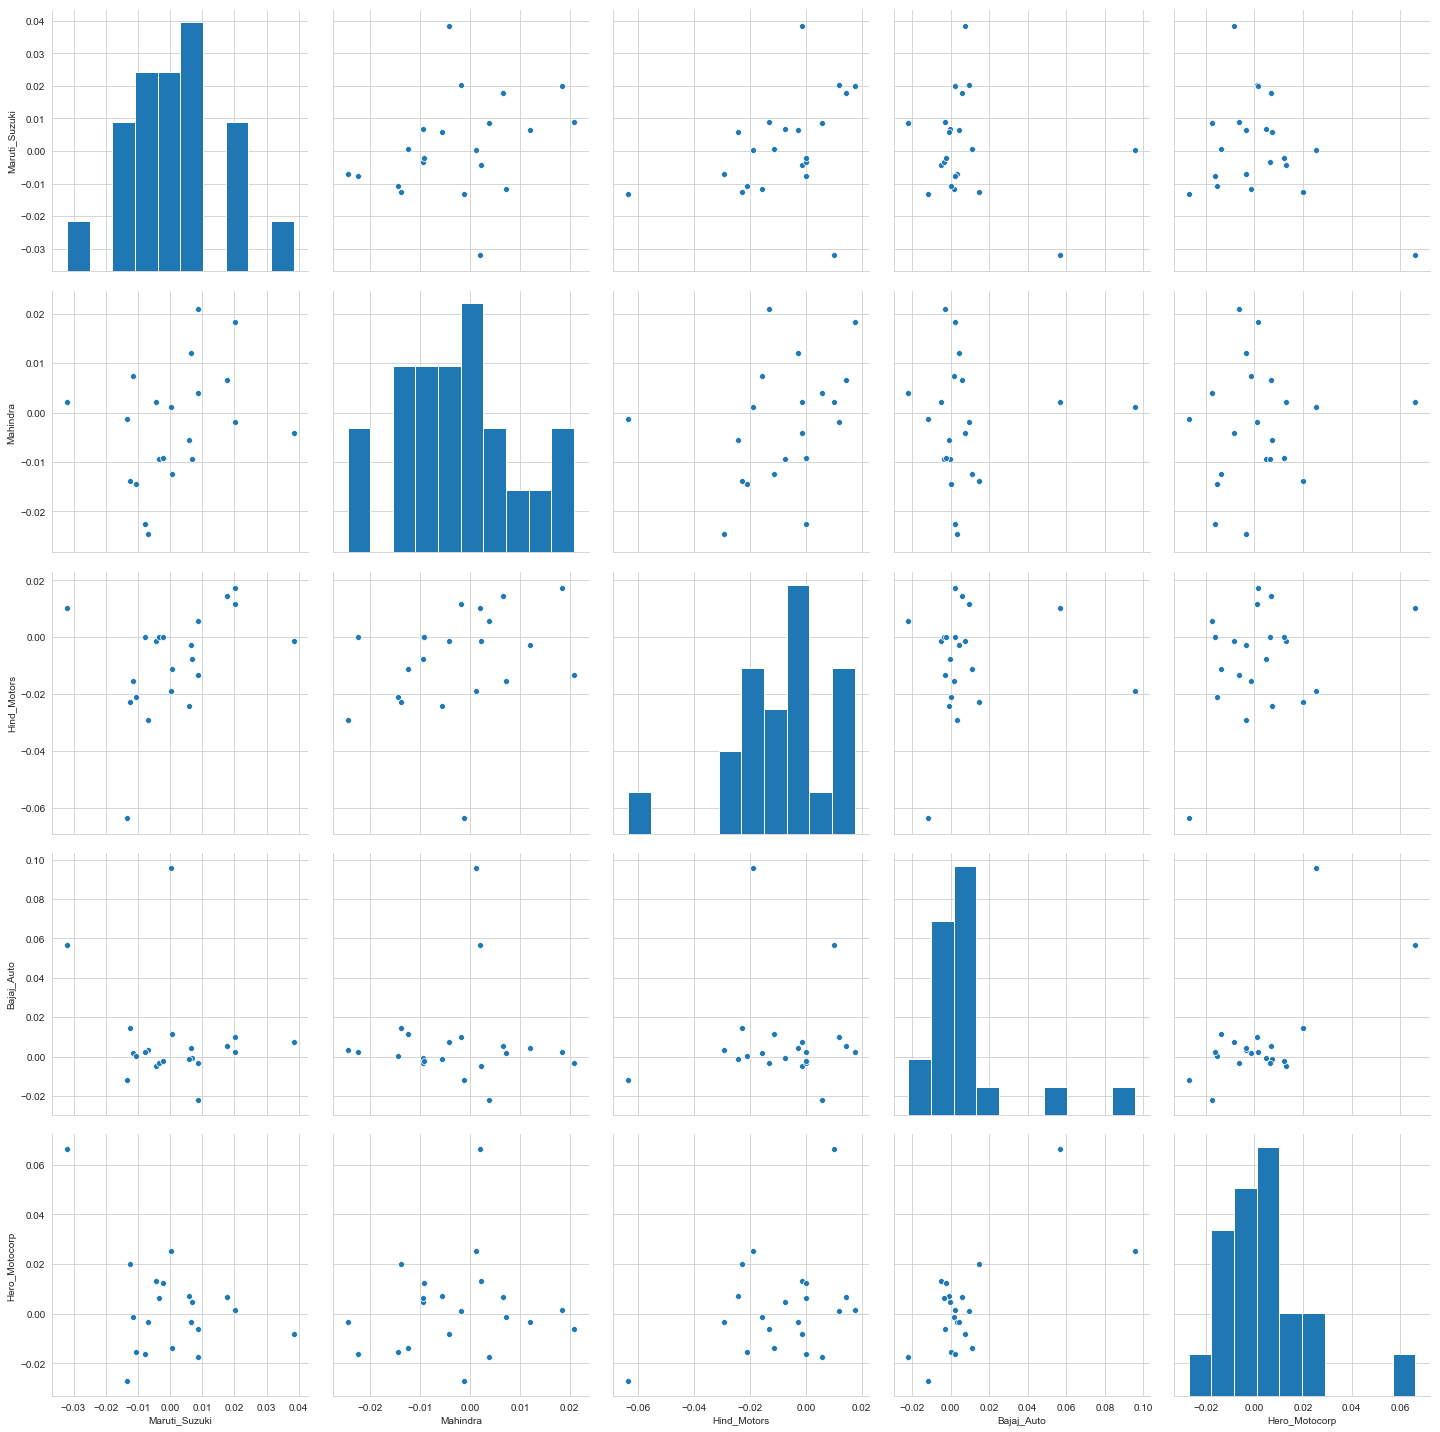

In [17]:
sns.pairplot(rets.dropna(),height=4)

# Correlation Matrix

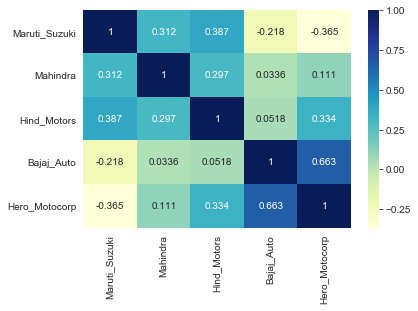

In [18]:
sns.heatmap(rets.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

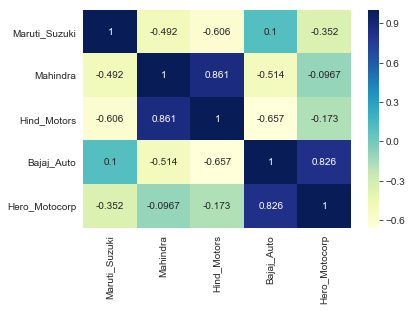

In [19]:
sns.heatmap(close_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<H2> Risk Return Analysis

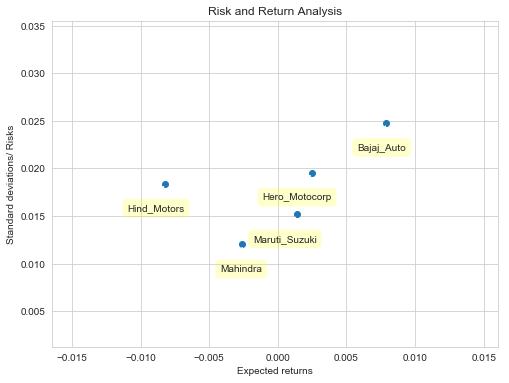

In [20]:
fig, ax = pt.subplots(figsize=(8,6))
pt.scatter(rets.mean(), rets.std())
pt.xlabel('Expected returns')
pt.ylabel('Standard deviations/ Risks')
pt.title('Risk and Return Analysis')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    pt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [21]:
import numpy as np
import statsmodels.api as sm
X=close_df[['Mahindra','Hind_Motors','Bajaj_Auto','Hero_Motocorp']]
X = sm.add_constant(X)
y=close_df['Maruti_Suzuki']
model = sm.OLS(y,X,missing='drop')             #drop rows with missing values
result = model.fit()                           #adjusts the data to model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Maruti_Suzuki   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     6.964
Date:                Wed, 15 Aug 2018   Prob (F-statistic):            0.00165
Time:                        01:14:32   Log-Likelihood:                -136.47
No. Observations:                  22   AIC:                             282.9
Df Residuals:                      17   BIC:                             288.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.237e+04   2843.788      4.349      0.000    6368.402    1.84e+04
Mahindra          2.2684      3.881      0.584      0.567      -5.920      10.457
Hind_Motors    -190.0321    222.985     -0.852      0.406    -660.489     280.424
Bajaj_Auto        0.8752      0.803      1.089      0.291      -0.820       2.570
Hero_Motocorp    -1.8618      0.959     -1.941      0.069      -3.885       0.162
==============================================================================
Omnibus:                        1.207   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.016
Skew:                           0.316   Prob(JB):                        0.602
Kurtosis:                       2.158   Cond. No.                     4.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Plotting the Predicted values and actual values to the model

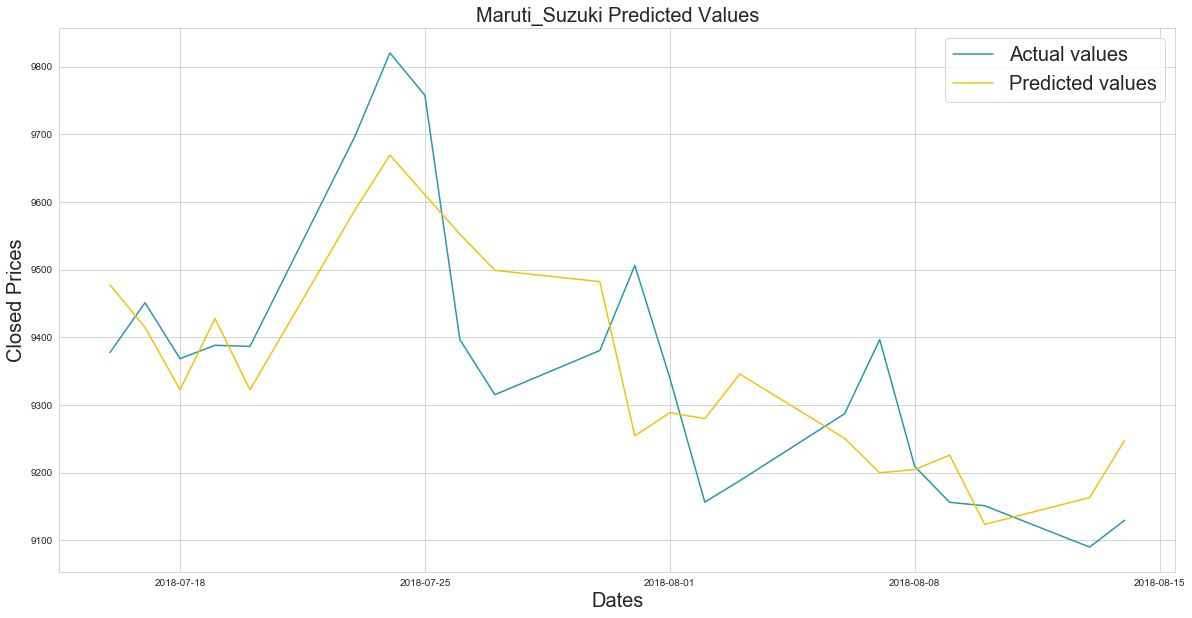

In [22]:
fig, ax = pt.subplots(figsize=(20,10))
ax.plot(y, color="#2498B0", label="Actual values")
ax.plot(result.fittedvalues, color='#f4c20d', label="Predicted values")
ax.set_xlabel('Dates',size=20)
ax.set_ylabel('Closed Prices',size=20)
ax.set_title('Maruti_Suzuki Predicted Values',size=20)
p,q = ax.get_legend_handles_labels()
ax.legend(p, q)
pt.legend(prop={'size':20})